In [1]:
#Importing all the libraries and modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
import seaborn as sns
import math

In [4]:
weather_df=pd.read_csv(r"/home/pi/mausam/mausam-main/models/Final Datasets/nRainfall.csv")

In [5]:
weather_df.shape

(100990, 10)

In [6]:
weather_df.describe()

,Date,Month,Hour,dewpt,humidity,rain,thunder,rain previous,temp
count,100990.000000,100990.000000,100990.000000,100369.000000,100233.000000,100990.000000,100990.000000,100990.000000,100317.000000
mean,15.690049,6.579344,10.928844,15.741205,57.909481,0.026260,0.009427,0.026260,25.451269
std,8.769718,3.475841,6.854328,7.058587,23.807771,0.159908,0.096633,0.159908,8.482859
min,1.000000,1.000000,0.000000,-24.000000,4.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,4.000000,5.000000,10.000000,39.000000,0.000000,0.000000,0.000000,19.000000
50%,16.000000,7.000000,11.000000,15.000000,59.000000,0.000000,0.000000,0.000000,27.000000
75%,23.000000,10.000000,17.000000,22.000000,78.000000,0.000000,0.000000,0.000000,32.000000
max,31.000000,12.000000,23.000000,75.000000,243.000000,1.000000,1.000000,1.000000,90.000000


In [7]:
weather_df.head()

,Date,Month,Hour,Time,dewpt,humidity,rain,thunder,rain previous,temp
0,1,11,11,11:00,9.0,27.0,0,0,0,30.0
1,1,11,12,12:00,10.0,32.0,0,0,0,28.0
2,1,11,13,13:00,11.0,44.0,0,0,0,24.0
3,1,11,14,14:00,10.0,41.0,0,0,0,24.0
4,1,11,16,16:00,11.0,47.0,0,0,0,23.0


<AxesSubplot:xlabel='rain', ylabel='count'>

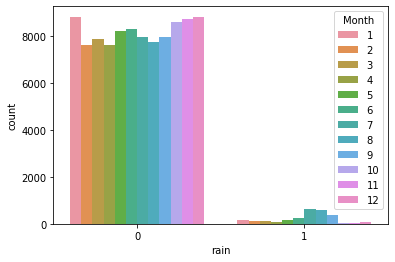

In [8]:
#Analyzing Data
sns.countplot(x="rain",hue="Month",data=weather_df)

<AxesSubplot:ylabel='Frequency'>

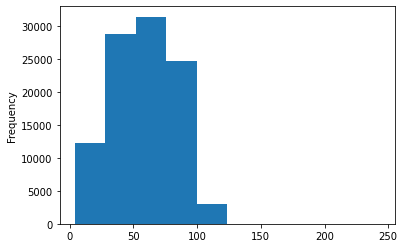

In [9]:
weather_df["humidity"].plot.hist()

Pre-Processing the data

# Preprocessing the data

In [10]:
print(weather_df.isnull().any())

Date             False
Month            False
Hour             False
Time             False
dewpt             True
humidity          True
rain             False
thunder          False
rain previous    False
temp              True
dtype: bool


In [11]:
# Temperature
def replace(j):
    if weather_df["temp"][j]!=(-10):
        return weather_df["temp"][j]
    else:
        return replace(j+1)
        
weather_df["temp"].fillna(-10, inplace = True)

for i in range(100990):
    if weather_df["temp"][i]==-10:
        weather_df["temp"][i]=(replace(i+1)+weather_df["temp"][i-1])/2
    elif weather_df["temp"][i]>=50:
        weather_df["temp"][i]=(weather_df["temp"][i-1]+weather_df["temp"][i+1])/2
        

In [12]:
weather_df["temp"][124]

15.5

In [13]:
# Humidity
weather_df["humidity"].fillna(-100, inplace = True)

print(weather_df["humidity"].isnull().any())

def replace(j):
    if weather_df["humidity"][j]!=(-100):
        return weather_df["humidity"][j]
    else:
        return replace(j+1)

for i in range(100990):
    if weather_df["humidity"][i]==-100:
        weather_df["humidity"][i]=(replace(i+1)+weather_df["humidity"][i-1])/2
    elif weather_df["humidity"][i]>100:
        weather_df["humidity"][i]=(weather_df["humidity"][i-1]+weather_df["humidity"][i+1])/2
        

False


In [14]:
weather_df["humidity"][124]

59.0

In [15]:
weather_df.drop(["Time"],axis=1,inplace=True)

In [16]:
# Dew Point

#Function for calculating Dew Point
import math
def ln(n):
    return math.log(n,math.e)
def Tdew(T,H):
    nl =ln(H/100)
    s=237.3+T
    m=17.27*T
    TD = (237.3*(nl+(m/s)))/(17.27+(-1)*(nl+(m/s)))    
    return TD

weather_df["dewpt"].fillna(-500, inplace = True)


for i in range(100990):
    if weather_df["dewpt"][i]==-500:
        weather_df["dewpt"][i]=Tdew(weather_df["temp"][i],weather_df["humidity"][i])
    elif weather_df["dewpt"][i]>40 or weather_df["dewpt"][i]<(-12):
        weather_df["dewpt"][i]=Tdew(weather_df["temp"][i],weather_df["humidity"][i])
        



In [17]:
weather_df["dewpt"][124]

7.531332110544606

In [18]:
weather_df.drop(["temp"],axis=1,inplace=True)

In [19]:
weather_df["Date"].fillna(-500, inplace = True)
sumdp=0
for i in range(100990):
    if weather_df["Date"][i]==-500:
        print(i)
        sumdp+=1
print(sumdp)

weather_df["Hour"].fillna(-500, inplace = True)
sumdp=0
for i in range(100990):
    if weather_df["Hour"][i]==-500:
        print(i)
        sumdp+=1
print(sumdp)

weather_df["Month"].fillna(-500, inplace = True)
sumdp=0
for i in range(100990):
    if weather_df["Month"][i]==-500:
        print(i)
        sumdp+=1
print(sumdp)

weather_df["rain"].fillna(-500, inplace = True)
sumdp=0
for i in range(100990):
    if weather_df["rain"][i]==-500:
        print(i)
        sumdp+=1
print(sumdp)

weather_df["rain previous"].fillna(-500, inplace = True)
sumdp=0
for i in range(100990):
    if weather_df["rain previous"][i]==-500:
        print(i)
        sumdp+=1
print(sumdp)

weather_df["thunder"].fillna(-500, inplace = True)
sumdp=0
for i in range(100990):
    if weather_df["thunder"][i]==-500:
        print(i)
        sumdp+=1
print(sumdp)

0
0
0
0
0
0


In [20]:
#Training and Testing the data
x=weather_df.drop(["rain"],axis=1)
y=weather_df["rain"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
prediction=logmodel.predict(x_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99     19685\n           1       0.49      0.23      0.31       513\n\n    accuracy                           0.97     20198\n   macro avg       0.73      0.61      0.65     20198\nweighted avg       0.97      0.97      0.97     20198\n'

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,prediction)
##  PN PY
##AN
##AY


array([[19563,   122],
       [  396,   117]], dtype=int64)

In [28]:
x_test.shape

(20198, 7)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9743538964253886

In [30]:
l=np.array([28,6,19,25,50,0,0]).reshape(1,-1)
print(logmodel.predict(l))

[0]


In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr.predict(l)

array([0], dtype=int64)

In [33]:
#Saving the Logistic Regression Model
from sklearn.externals import joblib
joblib.dump(logmodel, 'nPLogisticRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('HUMDT.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['nPLogisticRegression.pkl']

In [34]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [37]:
prediction4=regr.predict(x_test)
np.mean((prediction4-y_test)**2)

0.022088748879432178

In [38]:
l=np.array([28,6,19,25,50,0,0]).reshape(1,-1)
regr.predict(l)

array([0.])

In [39]:
#Saving the Random Forest Model
joblib.dump(regr, 'PRandomForest.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('PRandomForest.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['PRandomForest.pkl']